# 4.10 Coding Etiquette and Excel Reporting

### Table of Contents

1. Importing libraries and data
2. Addressing Personally Identifiable Information
3. Creating a regional flag within the dataset
4. Excluding low-activity customers
5. Creating customer "profile" for targeted marketing purposes
6. Visualizing "profile" distribution
7. Looking for insights through the customer "profile" groups
8. Comparing customer profiles with regions and departments

### 1. Importing libraries and data


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
#Creating a path for this project
path = r'/Users/manuellituma/01-2023 Instacart Basket Analysis'

In [9]:
# Importing 'orders_products_merged.pkl' via pandas.pkl and os.path.join
df_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_custm.pkl'))

### 2. Addressing Personally Identifiable Information

In [10]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
# Check shape of data frame
df_all.shape

(30328764, 31)

In [12]:
# Check data types
df_all.dtypes

order_id                   float64
user_id                     object
order_number               float64
orders_day_of_week         float64
order_hour_of_day          float64
days_since_prior_order     float16
product_id                 float64
add_to_cart_order          float64
reordered                  float64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float16
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                  float64
loyalty_flag                object
average_price              float16
spending_flag               object
median_prior_orders        float16
order_frequency_flag        object
gender                      object
state                       object
age                          int64
date_joined                 object
number_dependants   

#### A security concern of this dataset was the information related to name and surname. Nontheless, these columns were deleted in past exercise, due to that, they are not relevant for this specific project. In addition, user_id is more than enough to identify the different customers.

### 3. Creating a regional flag within the dataset

In [13]:
# Checking value counts for the state column
df_all['state'].value_counts()

Pennsylvania            626003
California              619377
Rhode Island            616005
Georgia                 615535
New Mexico              613252
Arizona                 613146
North Carolina          611018
Oklahoma                610954
Alaska                  607402
Minnesota               606952
Massachusetts           606002
Wyoming                 603254
Virginia                600998
Missouri                600027
Texas                   599536
Colorado                599168
Maine                   597710
North Dakota            597399
Alabama                 596749
Delaware                596476
Louisiana               596377
Kansas                  596360
South Carolina          596268
Nevada                  595274
Arkansas                595097
Oregon                  595079
New York                594878
Montana                 594458
Washington              593357
South Dakota            592697
Hawaii                  592166
Illinois                592080
Kentucky

#### Creating containing vectors for the different states

In [14]:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [15]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [16]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [17]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#### Creating column region

In [19]:
df_all.loc[df_all['state'].isin(Northeast), 'region'] = 'Northeast'

In [20]:
df_all.loc[df_all['state'].isin(Midwest), 'region'] = 'Midwest'

In [21]:
df_all.loc[df_all['state'].isin(South), 'region'] = 'South'

In [22]:
df_all.loc[df_all['state'].isin(West), 'region'] = 'West'

#### Checking new column 'region'

In [23]:
df_all['region'].value_counts()

South        10099818
West          7765088
Midwest       7107586
Northeast     5356272
Name: region, dtype: int64

In [24]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


### Determine whether there's a difference in spending habits between the different U.S regions

In [25]:
# Creating crosstab according to region and spending flag
crosstab = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False)

In [26]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,30388,7077198
Northeast,19254,5337018
South,40985,10058832
West,31312,7733776


##### There is a difference between the spending habits in the different regions. In general, there is a higher number low spender customers in all the areas. However, the south part presents the higher values in both cases.

### 4. Excluding low-activity customers


In [27]:
# Creating an exclusion flag
df_all.loc[df_all['max_order'] < 5, 'exclusion flag'] = 'low-activity'
df_all.loc[df_all['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [28]:
df_all['exclusion flag'].value_counts()

high-activity    29303281
low-activity      1025482
Name: exclusion flag, dtype: int64

In [29]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,exclusion flag
0,2398795.0,1,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
1,473747.0,1,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
2,2254736.0,1,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
3,431534.0,1,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
4,3367565.0,1,6.0,2.0,7.0,19.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity


In [30]:
# Excluding low activiy custumers from the dataset
df_2 = df_all.loc[df_all['exclusion flag'] == 'high-activity']

In [31]:
# Check dataframe shape
df_2.shape

(29303281, 33)

In [32]:
df_2['exclusion flag'].value_counts()

high-activity    29303281
Name: exclusion flag, dtype: int64

In [33]:
# Export data frame excluding low activity customers
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers.pkl'))

### 5. Creating customer "profile" for targeted marketing purposes

In [34]:
# Reloading scripts (most recently exported pkl)

# Importing data

# identifying project path
path = r'/Users/manuellituma/01-2023 Instacart Basket Analysis'

# Import Instacart prepared orders data
df_2 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_high_activity_customers.pkl'))

#### Analyzing variables

In [35]:
crossprofil = pd.crosstab(df_2['family_status'], df_2['number_dependants'], dropna = False)

In [36]:
crossprofil

number_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2504114,0,0,0
living with parents and siblings,0,481447,458654,462551
married,0,6822179,6858671,6894892
single,4820773,0,0,0


In [37]:
df_2['age'].describe()

count    2.930328e+07
mean     4.946594e+01
std      1.848512e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Text(0.5, 1.0, 'Income Distribution Among Instacart Users')

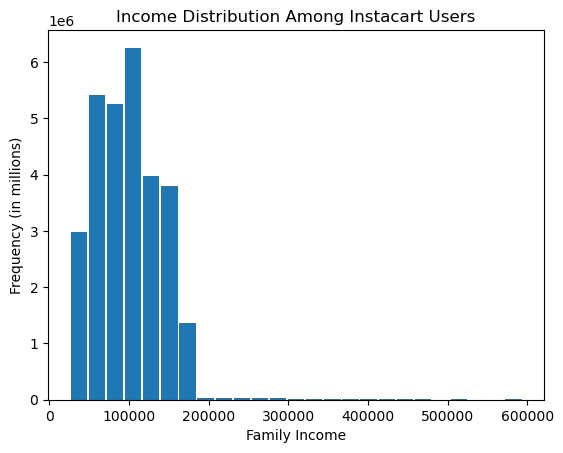

In [38]:
# creating histogram of incomes to see distribution

hist1 = df_2['income'].plot.hist(bins = 25, rwidth=0.9)

plt.xlabel("Family Income")
plt.ylabel("Frequency (in millions)")
plt.title("Income Distribution Among Instacart Users")

In [39]:
# exporting histogram
hist1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_customers_income.png'))

#### Creating profile column

In [40]:
# creating profile for "single adult with money"
df_2.loc[(df_2['family_status'] == 'single') & (df_2['age'] >= 18), 'profile'] = 'single adult'

In [41]:
# creating profile for small families with high incomes (above $100,000)
df_2.loc[(df_2['number_dependants'] == 1) & (df_2['income'] > 100000), 'profile'] = 'high-income small family'

In [42]:
# creating profile for medium families with high incomes (above $100,000)
df_2.loc[(df_2['number_dependants'] == 2) & (df_2['income'] > 100000), 'profile'] = 'high-income medium family'

In [43]:
# creating profile for big families with high incomes (above $100,000)
df_2.loc[(df_2['number_dependants'] == 3) & (df_2['income'] > 100000), 'profile'] = 'high-income big family'

In [44]:
# creating profile for small families with low incomes (below $100,000)
df_2.loc[(df_2['number_dependants'] == 1) & (df_2['income'] < 100000), 'profile'] = 'low-income small family'

In [45]:
# creating profile for medium families with low incomes (below $100,000)
df_2.loc[(df_2['number_dependants'] == 2) & (df_2['income'] < 100000), 'profile'] = 'low-income medium family'

In [46]:
# creating profile for big families with low incomes (below $100,000)
df_2.loc[(df_2['number_dependants'] == 3) & (df_2['income'] < 100000), 'profile'] = 'low-income big family'

In [47]:
# creating profile for "babies at home"  (department = 18 = babies)
df_2.loc[(df_2['number_dependants'] > 0) & (df_2['department_id'] == 18), 'profile'] = 'babies at home'

In [48]:
# creating profile for "employees" (department = 14 = breakfast)
df_2.loc[(df_2['order_hour_of_day'] < 12)  & (df_2['department_id'] == 14) & (df_2['age'] > 30) & (df_2['income'] > 30000), 'profile'] = 'employees'

In [49]:
# creating profile for "retired wealthy" 
df_2.loc[(df_2['age'] >= 65) & (df_2['income'] > 100000), 'profile'] = 'retired wealthy'

In [50]:
# creating profile for "retired less money" 
df_2.loc[(df_2['age'] < 65) & (df_2['income'] < 100000), 'profile'] = 'retired less money'

In [51]:
# labelling everyone else as "other"
df_2['profile'] = df_2['profile'].fillna('other')

In [52]:
df_2['profile'].value_counts(dropna = False)

retired less money           13532457
retired wealthy               5434954
high-income big family        1970262
high-income small family      1963996
high-income medium family     1915637
single adult                  1619773
other                          964787
low-income medium family       581930
low-income small family        576689
low-income big family          555939
babies at home                 105813
employees                       81044
Name: profile, dtype: int64

### 6. Visualizing "profile" distribution

([<matplotlib.axis.XTick at 0x7f8c508c00d0>,
 [Text(0, 0, 'retired\nless money'),
  Text(1, 0, 'retired\nwealthy'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nsmall family '),
  Text(4, 0, 'high-income\nmedium family'),
  Text(5, 0, 'single adult'),
  Text(6, 0, 'other'),
  Text(7, 0, 'low-income\nmedium family '),
  Text(8, 0, 'low-income\nsmall family '),
  Text(9, 0, 'low-income\nbig family'),
  Text(10, 0, 'babies\nat home '),
  Text(11, 0, 'employees')])

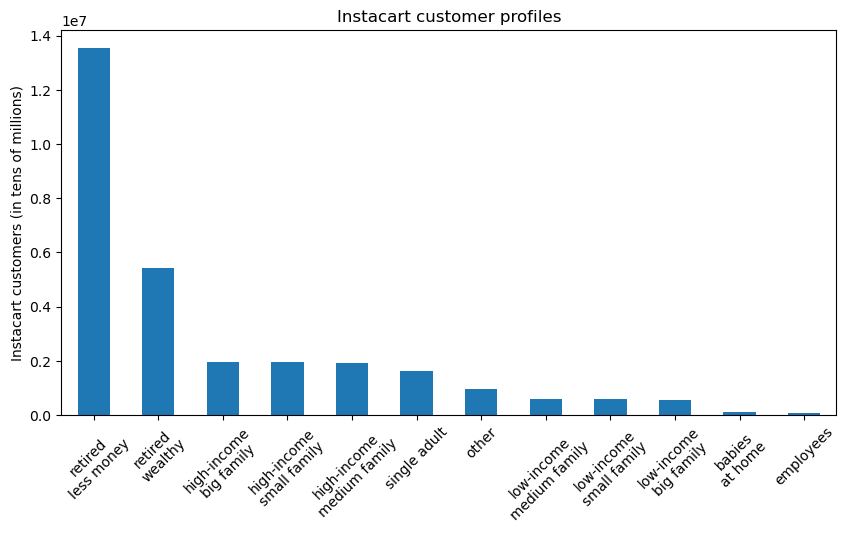

In [53]:
# creating a bar chart of instacart profiles

bar = df_2['profile'].value_counts().plot.bar(rot=45, figsize = (10,5))
plt.ylabel("Instacart customers (in tens of millions)")
plt.title ("Instacart customer profiles")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['retired\nless money','retired\nwealthy','high-income\nbig family', 'high-income\nsmall family ', 'high-income\nmedium family','single adult','other','low-income\nmedium family ','low-income\nsmall family ','low-income\nbig family','babies\nat home ','employees'])


In [54]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles.png'), bbox_inches='tight')

### 7. Looking for insights through the customer "profile" groups

In [55]:
# Calculating the mode to see most usual values per column
print(df_2.groupby('profile').agg(lambda x:x.value_counts().index[0]))

                            order_id user_id  order_number  \
profile                                                      
babies at home             2933894.0   84092           5.0   
employees                   289457.0  178520           5.0   
high-income big family     1564244.0  108187           3.0   
high-income medium family   604218.0  175294           4.0   
high-income small family    653887.0  132022           5.0   
low-income big family       384383.0  140440           2.0   
low-income medium family   1037729.0   74315           2.0   
low-income small family    1321070.0   17738           5.0   
other                      2660847.0  176478           4.0   
retired less money          790903.0  129928           3.0   
retired wealthy            2716231.0  201268           2.0   
single adult               1737192.0   13701           4.0   

                           orders_day_of_week  order_hour_of_day  \
profile                                                        

#### From this calculation we found some interesting information:

1. Most customers buy between 9 to 14 o'clock
2. Usually they buy products every 7 days
3. The most common days for the customers to buy are saturday and sunday

In [56]:
# aggregating min, max, mean of prices and avg_days_since_last_order for all profiles
df_2.groupby('profile').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices                 days_since_prior_order  \
                               mean  min        max                   mean   
profile                                                                      
babies at home             7.644531  1.0  15.000000               9.687500   
employees                  8.046875  1.0  14.898438              10.804688   
high-income big family     7.953125  1.0  25.000000              10.843750   
high-income medium family  7.957031  1.0  25.000000              10.875000   
high-income small family   7.953125  1.0  25.000000              10.796875   
low-income big family      7.406250  1.0  25.000000              10.937500   
low-income medium family   7.417969  1.0  25.000000              10.953125   
low-income small family    7.429688  1.0  25.000000              10.773438   
other                      7.652344  1.0  25.000000              10.781250   
retired less money         7.691406  1.0  25.000000              10.835938   
retired wealthy            7.957031  1.0  25.000000              10.757812   
single adult               7.945312  1.0  25.000000              10.664062   

                                      
                           min   max  
profile                               
babies at home             0.0  30.0  
employees                  0.0  30.0  
high-income big family     0.0  30.0  
high-income medium family  0.0  30.0  
high-income small family   0.0  30.0  
low-income big family      0.0  30.0  
low-income medium family   0.0  30.0  
low-income small family    0.0  30.0  
other                      0.0  30.0  
retired less money         0.0  30.0  
retired wealthy            0.0  30.0  
single adult               0.0  30.0

### 8. Comparing customer profiles with regions and departments

In [57]:
# creating a crosstab to compare different profiles by region
crosstab_region = pd.crosstab(df_2['profile'], df_2['region'], dropna = False)

In [58]:
crosstab_region

region,Midwest,Northeast,South,West
profile,,,,
babies at home,24458,18320,36241,26794
employees,19418,13806,26329,21491
high-income big family,470891,352045,636514,510812
high-income medium family,469533,342973,632724,470407
high-income small family,480959,352049,626135,504853
low-income big family,124346,96747,184781,150065
low-income medium family,126955,101282,197695,155998
low-income small family,131986,108718,190883,145102
other,238224,168729,323374,234460


In [59]:
# creating a crosstab to compare different profiles by department
crosstab_department = pd.crosstab(df_2['profile'], df_2['department_id'], dropna = False)

In [60]:
crosstab_department

department_id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
profile,,,,,,,,,,,,,,,,,,,,,
babies at home,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,105813,0,0,0
employees,0,0,0,0,0,0,0,0,0,0,...,0,0,81044,0,0,0,0,0,0,0
high-income big family,139614,2295,73979,602956,10178,16819,159164,7069,55750,1803,...,47738,117812,26861,68697,341518,45652,0,155717,64699,4111
high-income medium family,136596,2081,74296,576703,9640,16318,156919,5601,53927,1914,...,46724,116528,26226,67022,333175,44663,0,151675,64351,4237
high-income small family,138620,2248,73811,599863,9781,17043,159037,5822,54826,2200,...,47600,119228,27406,68894,340335,45644,0,156258,63200,4589
low-income big family,36475,512,19279,161794,2403,4133,53611,1435,13111,835,...,10215,30516,7948,16400,90742,13400,0,66292,18092,1177
low-income medium family,39903,641,20455,168569,2551,4656,54781,1278,14476,700,...,10810,33015,8436,17804,94950,13804,0,66933,18647,1304
low-income small family,39204,713,20614,165087,2719,4632,56399,1751,13469,693,...,10920,32281,8513,16682,94447,14683,0,66528,18370,1101
other,66768,1091,35463,277680,4283,7737,85094,2500,24692,1069,...,19640,54156,13638,29585,162595,21410,13579,96135,32096,2056


([<matplotlib.axis.XTick at 0x7f878ba89970>,
 [Text(0, 0, 'babies\nat home '),
  Text(1, 0, 'employees'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nmedium family'),
  Text(4, 0, 'high-income\nsmall family'),
  Text(5, 0, 'low-income\nbig family'),
  Text(6, 0, 'low-income\nmedium family '),
  Text(7, 0, 'low-income\nsmall family '),
  Text(8, 0, 'other'),
  Text(9, 0, 'retired\nless money'),
  Text(10, 0, 'retired\nwealthy'),
  Text(11, 0, 'single adult')])

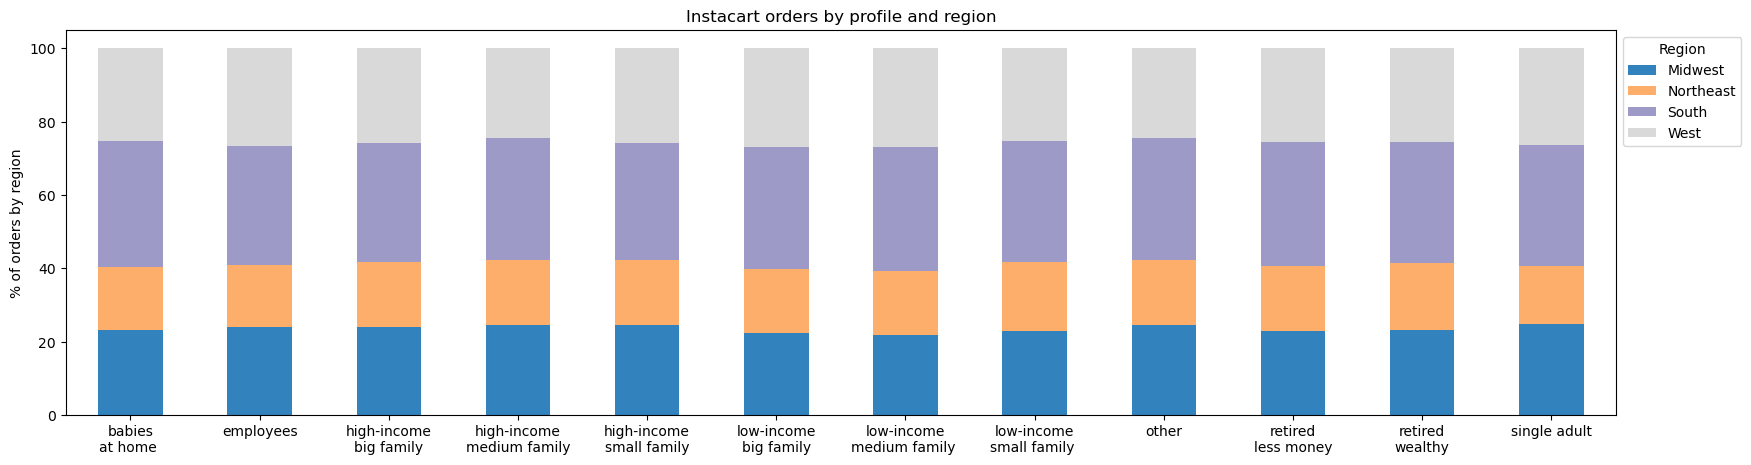

In [61]:
# Creating stacked bar graph to plot profile for regions
bar_profile_region = crosstab_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['babies\nat home ','employees','high-income\nbig family','high-income\nmedium family','high-income\nsmall family','low-income\nbig family','low-income\nmedium family ','low-income\nsmall family ','other','retired\nless money','retired\nwealthy', 'single adult'])

In [62]:
# exporting bar chart
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_region.png'), bbox_inches='tight')

([<matplotlib.axis.XTick at 0x7f878b8c4cd0>,
 [Text(0, 0, 'babies\nat home '),
  Text(1, 0, 'employees'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nmedium family'),
  Text(4, 0, 'high-income\nsmall family'),
  Text(5, 0, 'low-income\nbig family'),
  Text(6, 0, 'low-income\nmedium family '),
  Text(7, 0, 'low-income\nsmall family '),
  Text(8, 0, 'other'),
  Text(9, 0, 'retired\nless money'),
  Text(10, 0, 'retired\nwealthy'),
  Text(11, 0, 'single adult')])

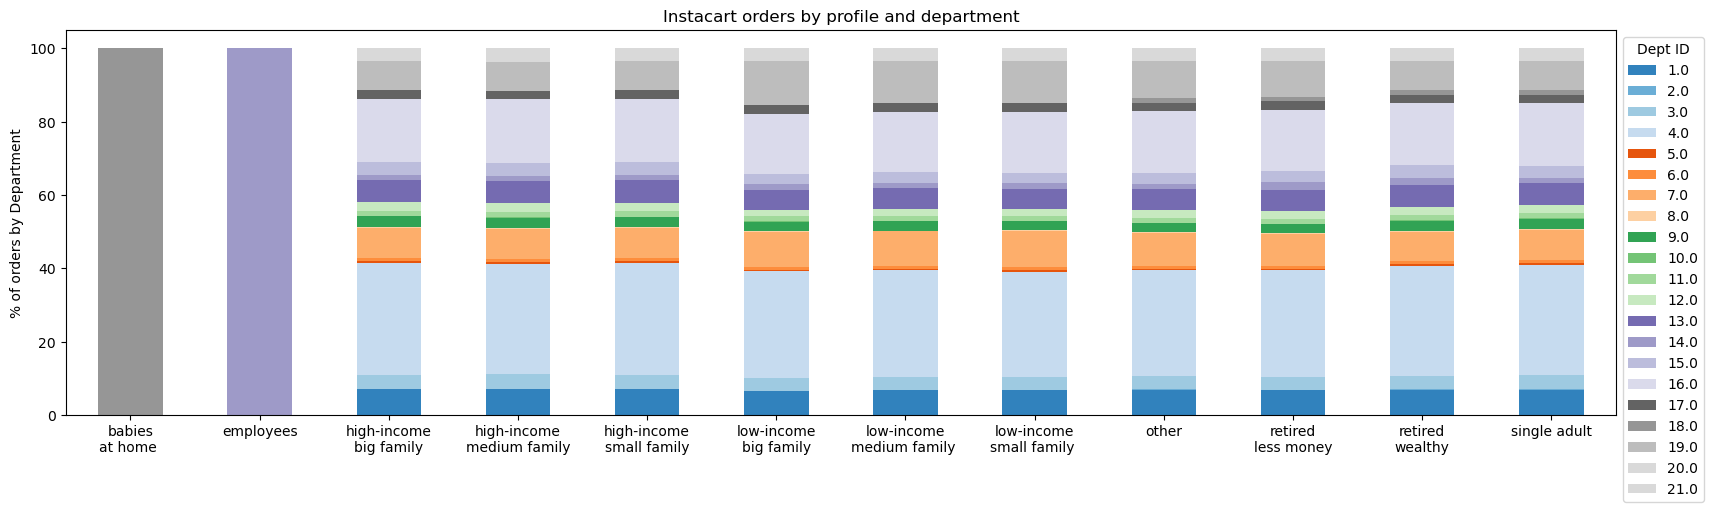

In [63]:
##### Creating stacked bar graph to plot profile for department
bar_profile_department = crosstab_department.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Dept ID", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by Department")
plt.title ("Instacart orders by profile and department")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['babies\nat home ','employees','high-income\nbig family','high-income\nmedium family','high-income\nsmall family','low-income\nbig family','low-income\nmedium family ','low-income\nsmall family ','other','retired\nless money','retired\nwealthy', 'single adult'])

### Extra plots

### Are there differences in ordering habits based on a customer’s region?

In [64]:
# creating a crosstab to compare different orders by region and price range
crosstab_orders_regions1 = pd.crosstab(df_2['region'], df_2['price_range_loc'], dropna = False)

In [65]:
crosstab_orders_regions1

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,87962,2144620,4635837
Northeast,65887,1621053,3485921
South,125314,3043832,6587727
West,96670,2345813,5062645


Text(0.5, 1.0, 'Instacart orders by region and price range groupings')

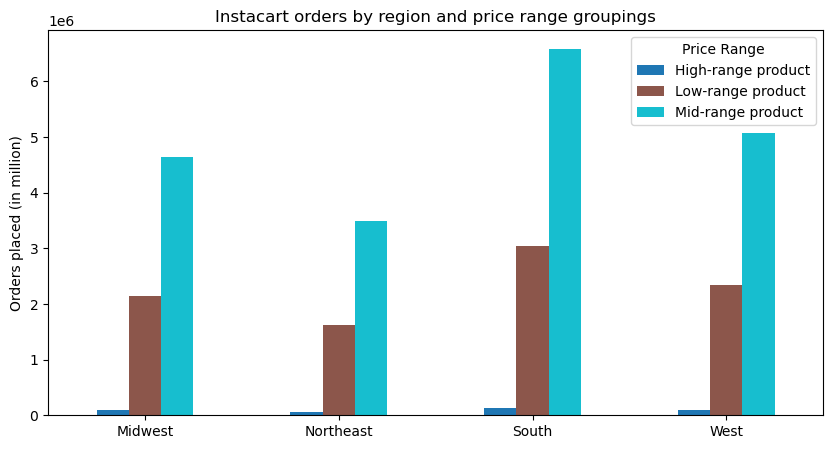

In [66]:
#creating a bar chart
barchart_price_region1 = crosstab_orders_regions1.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), colormap='tab10').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by region and price range groupings")

In [67]:
# creating a crosstab to compare different orders by region and loyalty
crosstab_orders_regions1 = pd.crosstab(df_2['region'], df_2['loyalty_flag'], dropna = False)

In [68]:
crosstab_orders_regions1

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2329930,976004,3562485
Northeast,1807933,723027,2641901
South,3342987,1369008,5044878
West,2614531,1058170,3832427


Text(0.5, 1.0, 'Instacart orders by region and loyalty groupings')

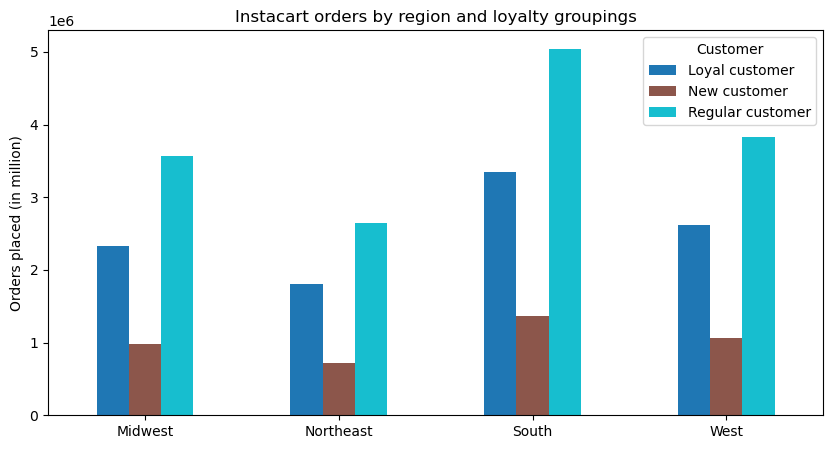

In [69]:
#creating a bar chart
barchart_loyalty_region1 = crosstab_orders_regions1.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), colormap='tab10').legend(title="Customer", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in million)")
plt.title ("Instacart orders by region and loyalty groupings")

### What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?


##### Creating age categories

In [70]:
# creating age categories
df_2.loc[(df_2['age'] ==18) & (df_2['age'] < 25), 'age_flag'] = 'Youth (15-24 years)'
df_2.loc[(df_2['age'] ==25) & (df_2['age'] < 45), 'age_flag'] = 'Adult I (25-44 years)'
df_2.loc[(df_2['age'] ==44) & (df_2['age'] < 65), 'age_flag'] = 'Adult II (45-64 years)'
df_2.loc[(df_2['age'] > 64), 'age_flag'] = 'Seniors (65 years and over)'

In [71]:
df_2['age_flag'].value_counts()

Seniors (65 years and over)    7754560
Adult II (45-64 years)          468245
Youth (15-24 years)             453014
Adult I (25-44 years)           424741
Name: age_flag, dtype: int64

Text(0.5, 1.0, 'Instacart income for differente profiles')

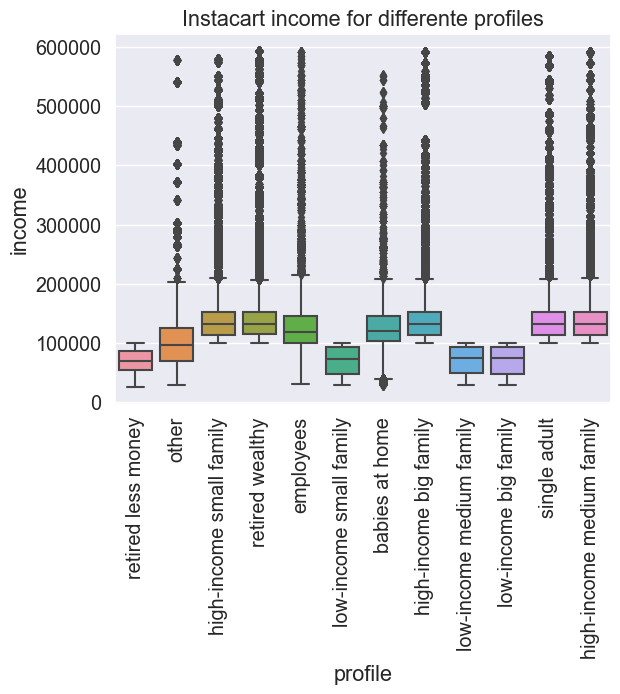

In [72]:
sns.set(font_scale=1.3)
boxplot_profile_income = sns.boxplot(x='profile',
                y='income',
                data=df_2)
plt.xticks(rotation=90)
plt.title ("Instacart income for differente profiles")

Text(0.5, 1.0, 'Instacart income for differente ages')

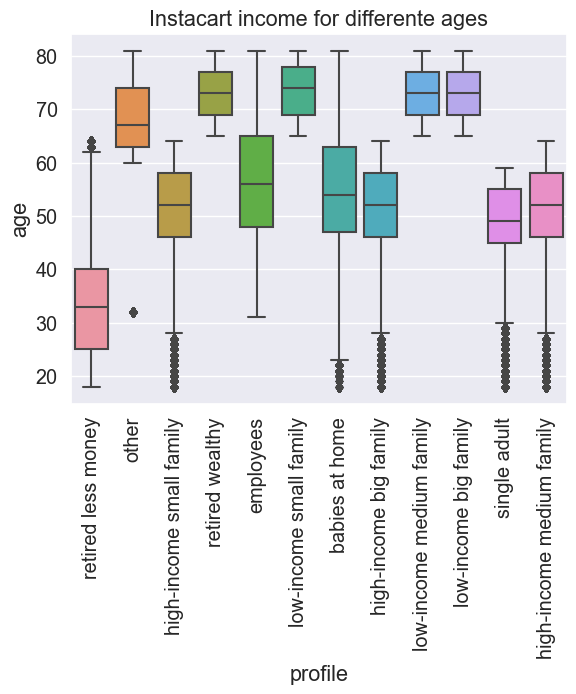

In [73]:
sns.set(font_scale=1.3)
boxplot_profile_age = sns.boxplot(x='profile',
                y='age',
                data=df_2)
plt.xticks(rotation=90)
plt.title ("Instacart income for differente ages")

In [74]:
# creating a crosstab to compare different orders by region and loyalty
crosstab_profile_family = pd.crosstab(df_2['profile'], df_2['family_status'], dropna = False)

In [75]:
crosstab_profile_family

family_status,divorced/widowed,living with parents and siblings,married,single
profile,,,,
babies at home,0,471,105342,0
employees,7930,0,60754,12360
high-income big family,0,14721,1955541,0
high-income medium family,0,13581,1902056,0
high-income small family,0,16414,1947582,0
low-income big family,0,0,555939,0
low-income medium family,0,0,581930,0
low-income small family,0,0,576689,0
other,964449,0,338,0


([<matplotlib.axis.XTick at 0x7f8fb70bbca0>,
 [Text(0, 0, 'babies\nat home '),
  Text(1, 0, 'employees'),
  Text(2, 0, 'high-income\nbig family'),
  Text(3, 0, 'high-income\nmedium family'),
  Text(4, 0, 'high-income\nsmall family'),
  Text(5, 0, 'low-income\nbig family'),
  Text(6, 0, 'low-income\nmedium family '),
  Text(7, 0, 'low-income\nsmall family '),
  Text(8, 0, 'other'),
  Text(9, 0, 'retired\nless money'),
  Text(10, 0, 'retired\nwealthy'),
  Text(11, 0, 'single adult')])

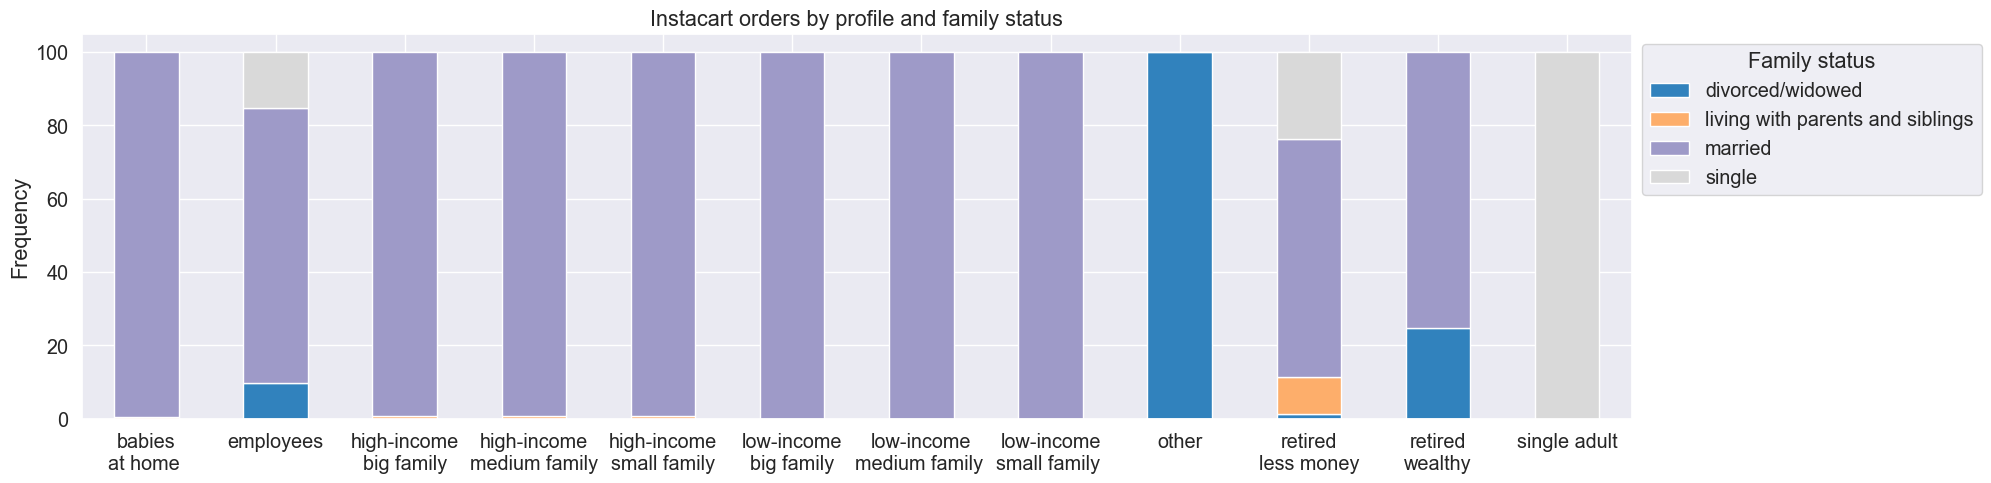

In [76]:
# Creating stacked bar graph to plot profile for family status
bar_profile_family = crosstab_profile_family.loc[:,['divorced/widowed','living with parents and siblings','married','single']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Family status", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Frequency")
plt.title ("Instacart orders by profile and family status")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['babies\nat home ','employees','high-income\nbig family','high-income\nmedium family','high-income\nsmall family','low-income\nbig family','low-income\nmedium family ','low-income\nsmall family ','other','retired\nless money','retired\nwealthy', 'single adult'])

### Saving plots

In [77]:
# exporting bar chart
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_department.png'), bbox_inches='tight')

In [78]:
barchart_price_region1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barchart_price_region1.png'), bbox_inches='tight')

In [79]:
barchart_loyalty_region1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barchart_loyalty_region1.png'), bbox_inches='tight')

In [80]:
boxplot_profile_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_profile_income.png'), bbox_inches='tight')

In [81]:
boxplot_profile_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_profile_age.png'), bbox_inches='tight')

In [82]:
bar_profile_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_family.png'), bbox_inches='tight')

### 9. Exporting dataset

In [83]:
# Export data frame with new variable profile
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers_profile.pkl'))